In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Равновесие жидкость−пар. Построение фазовой диаграммы двухкомпонентной системы и определение коэффициентов активности по давлению пара компонентов.

Компонент 1 - **Бензол**

$M_{бензол} = 78.11 \ g/mol$

$d_{бензол} = 0.879 \ g/cm^3$

Компонент 2 - **Изопропанол**

$M_{изопропанол} = 60.1 \ g/mol$

$d_{изопропанол} = 0.785 \ g/cm^3$

Объем системы **10 ml**

Атмосферное давление **746** мм. рт. ст.

In [3]:
# Constants value

M1 = 78.11
M2 = 60.1
d1 = 0.879
d2 = 0.785

### Поскольку при построении фазовых диаграмм по оси абсцисс откладывают состав в мольных долях, проведите пересчёт от объёмных долей к мольным по формуле:

Формула для пересчёта объёмной доли в мольную:

$$
x = \frac{1}{\frac{M_1}{M_2} \cdot \frac{d_2}{d_1} \cdot \frac{1}{\varphi_1} + \left(1 - \frac{M_1}{M_2} \cdot \frac{d_2}{d_1}\right)}
$$

где:
- $ x $ — мольная доля компонента,
- $ M_1, M_2 $ — молярные массы компонентов 1 и 2,
- $ d_1, d_2 $ — плотности чистых компонентов при температуре опыта,
- $ \varphi_1 $ — объёмная доля компонента 1.

In [ ]:
data = pd.read_csv('3.csv', index_col='№').drop(columns=['T1 (K)', 'T2 (K)'])

phi2 = data['f2'] / 100.0

phi2 = np.clip(phi2, 1e-8, 1)

k = (M2 * d1) / (M1 * d2)
data['x2'] = 1.0 / ((1.0 + k / phi2)- k)

# Мольная доля второго компонента
data.loc[1, 'x2'] = 0

data.style.format('{:.2f}')

data

,f2,T (K),n init.,n cond.,x2
№,,,,,
1,0,75.686364,1.5010,1.4980,0.000000
2,10,75.180000,1.4890,1.4620,0.114233
3,20,75.200000,1.4720,1.4585,0.224909
4,30,75.443750,1.4590,1.4535,0.332191
5,40,75.828571,1.4455,1.4510,0.436235
6,50,76.466667,1.4375,1.4460,0.537183
7,60,77.360000,1.4180,1.4430,0.635173
8,70,78.387500,1.4115,1.4365,0.730331
9,80,79.616667,1.3995,1.4270,0.822781


### Построение калибровочной зависимости


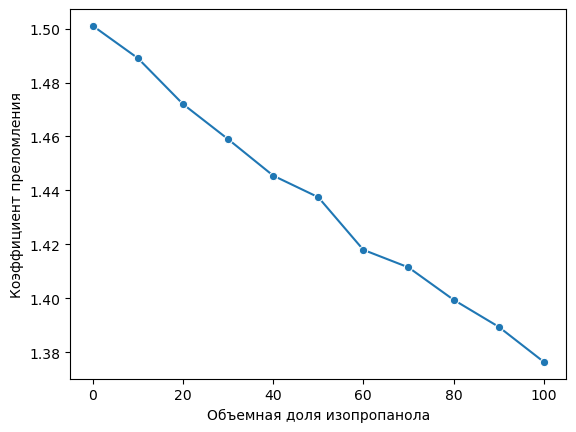

In [5]:
ax = sns.lineplot(data=data, x='f2', y='n init.', marker='o')
ax.set_xlabel('Объемная доля изопропанола')
ax.set_ylabel('Коэффициент преломления')

plt.show()

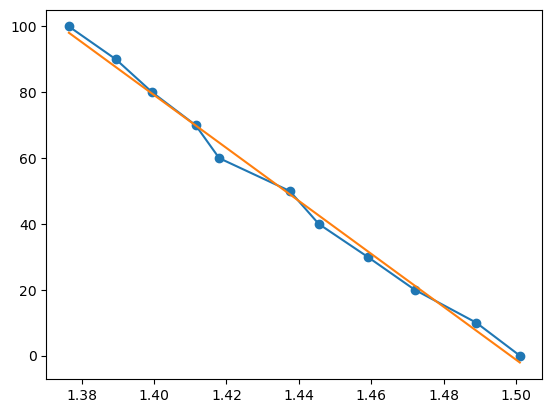

In [7]:
y = data['f2'].values.reshape(-1, 1)
x = data['n init.'].values.reshape(-1, 1)

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

w = model.coef_
b = model.intercept_

plt.plot(x, y, marker='o')
plt.plot(x, w*x + b)

In [8]:
y_pred = model.predict(x)

print(r2_score(y, y_pred))

0.9951051441750692


### Определение $\phi$ по калибровочной зависимости

$\phi$ = f cond.

In [11]:
data['f cond.'] = model.predict(data['n cond.'].values.reshape(-1, 1))
data.iloc[0, -1] = 0
data.iloc[-1, -1] = 100
data

,f2,T (K),n init.,n cond.,x2,f cond.
№,,,,,,
1,0,75.686364,1.5010,1.4980,0.000000,0.000000
2,10,75.180000,1.4890,1.4620,0.114233,29.300643
3,20,75.200000,1.4720,1.4585,0.224909,32.116633
4,30,75.443750,1.4590,1.4535,0.332191,36.139476
5,40,75.828571,1.4455,1.4510,0.436235,38.150898
6,50,76.466667,1.4375,1.4460,0.537183,42.173741
7,60,77.360000,1.4180,1.4430,0.635173,44.587447
8,70,78.387500,1.4115,1.4365,0.730331,49.817143
9,80,79.616667,1.3995,1.4270,0.822781,57.460546


In [13]:
phi_cond = data['f cond.']/100
data['x cond.'] = 1.0 / ((1.0 + k / phi_cond)- k)
data

,f2,T (K),n init.,n cond.,x2,f cond.,x cond.
№,,,,,,,
1,0,75.686364,1.5010,1.4980,0.000000,0.000000,0.000000
2,10,75.180000,1.4890,1.4620,0.114233,29.300643,0.324795
3,20,75.200000,1.4720,1.4585,0.224909,32.116633,0.354479
4,30,75.443750,1.4590,1.4535,0.332191,36.139476,0.396443
5,40,75.828571,1.4455,1.4510,0.436235,38.150898,0.417233
6,50,76.466667,1.4375,1.4460,0.537183,42.173741,0.458437
7,60,77.360000,1.4180,1.4430,0.635173,44.587447,0.482920
8,70,78.387500,1.4115,1.4365,0.730331,49.817143,0.535364
9,80,79.616667,1.3995,1.4270,0.822781,57.460546,0.610562


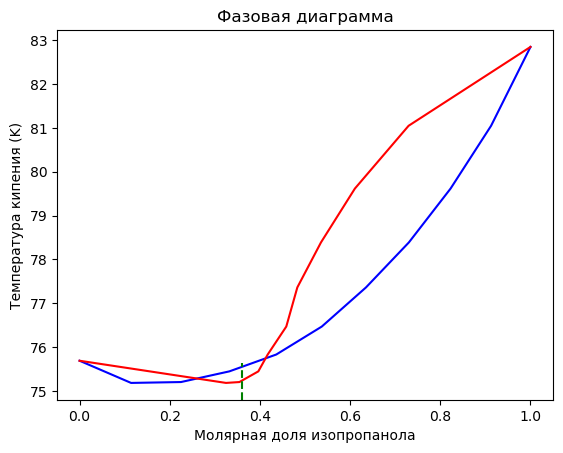

In [19]:
y = data['T (K)']

plt.plot(data['x2'], y, color='blue')
plt.plot(data['x cond.'], y, color='red')
plt.xlabel('Молярная доля изопропанола')
plt.ylabel('Температура кипения (K)')
plt.title('Фазовая диаграмма')
plt.axvline(0.36, ymin=0, ymax=0.1, linestyle='--', color='green')